## Assigment 1

In [388]:
# Libraries
import warnings
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ignore warning messages
warnings.filterwarnings('ignore')

# static variables
order_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
                "November", "December"]

In [389]:
def preprocessing(data):
    corpus = []
    ps = PorterStemmer()
    for i in range(len(data)):
        clean_df = re.sub("[^\w\s]"," ",r[i])
        clean_df = clean_df.lower()
        clean_df = clean_df.split()
        clean_df = [ps.stem(word) for word in clean_df if word not in set(stopwords.words("english"))]
        clean_df = " ".join(clean_df)
        corpus.append(clean_df)
    return corpus

In [390]:
class GeneralGraphs:
    def __init__(self, title, x_rotation=None, x_fontsize=None, bar_rotation=None, bar_fontsize=None,
                 column_huge_name=None, legend_loc='upper left'):
        self.title = title
        self.x_rotation = x_rotation
        self.x_fontsize = x_fontsize
        self.bar_rotation = bar_rotation
        self.bar_fontsize = bar_fontsize
        self.column_huge_name = column_huge_name
        self.legend_loc = legend_loc

    def bar_plot(self, column_x, column_y, column_x_name, column_y_name, column_hue=None, order_x=None):
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(x=column_x, y=column_y, hue=column_hue, order=order_x, ax=ax, errorbar=None)
        [ax.bar_label(cont, padding=5, fmt='%d', fontsize=self.bar_fontsize, rotation=self.bar_rotation) for cont in
         ax.containers]
        plt.xlabel(column_x_name)
        plt.ylabel(column_y_name)
        if column_hue is not None and self.column_huge_name is not None:
            plt.legend(title=self.column_huge_name, loc=self.legend_loc)
        plt.title(self.title, fontsize=10).set_position([0.5, 1.05])
        plt.xticks(rotation=self.x_rotation, fontsize=10)
        plt.show()


In [391]:
# Read file and set Date column as a datetime data type
custom_date_parser = lambda x: datetime.strptime(x, "%d %B %Y")
df = pd.read_csv("data_reviews.csv", parse_dates=["date"], date_parser=custom_date_parser)

In [392]:
df1 = df.copy()

In [393]:
df1

,Unnamed: 0,spoilers,rating,title,user,date,content
0,0,True,10/10,Some birds aren\'t meant to be caged.,hitchcockthelegend,2010-07-24,The Shawshank Redemption is written and direct...
1,1,False,10/10,An incredible movie. One that lives with you.,Sleepin_Dragon,2021-02-17,It is no wonder that the film has such a high ...
2,2,False,10/10,Don\'t Rent Shawshank.,EyeDunno,2005-11-21,I'm trying to save you money; this is the last...
3,3,False,10/10,This is How Movies Should Be Made,alexkolokotronis,2008-02-18,This movie is not your ordinary Hollywood flic...
4,4,True,10/10,A classic piece of unforgettable film-making.,kaspen12,2006-02-10,"In its Oscar year, Shawshank Redemption (writt..."
...,...,...,...,...,...,...,...
2489,2489,True,10/10,A Lesson in Film History,Eumenides_0,2010-02-25,Watching Fritz Lang's M is watching the histor...
2490,2490,False,10/10,Timeless.,Quicksand,2001-11-03,As riveting as it is intellectually demanding....
2491,2491,False,10/10,"60 years old, and still uber-suspenseful",Caliban-6,1999-01-04,The opening scene of this movie is the first c...
2492,2492,False,10/10,As relevant today as when it was made,meathookcinema,2017-11-01,This film works on many different levels.First...


In [394]:
df1.head()

,Unnamed: 0,spoilers,rating,title,user,date,content
0,0,True,10/10,Some birds aren\'t meant to be caged.,hitchcockthelegend,2010-07-24,The Shawshank Redemption is written and direct...
1,1,False,10/10,An incredible movie. One that lives with you.,Sleepin_Dragon,2021-02-17,It is no wonder that the film has such a high ...
2,2,False,10/10,Don\'t Rent Shawshank.,EyeDunno,2005-11-21,I'm trying to save you money; this is the last...
3,3,False,10/10,This is How Movies Should Be Made,alexkolokotronis,2008-02-18,This movie is not your ordinary Hollywood flic...
4,4,True,10/10,A classic piece of unforgettable film-making.,kaspen12,2006-02-10,"In its Oscar year, Shawshank Redemption (writt..."


In [395]:
df.tail()

,Unnamed: 0,spoilers,rating,title,user,date,content
2489,2489,True,10/10,A Lesson in Film History,Eumenides_0,2010-02-25,Watching Fritz Lang's M is watching the histor...
2490,2490,False,10/10,Timeless.,Quicksand,2001-11-03,As riveting as it is intellectually demanding....
2491,2491,False,10/10,"60 years old, and still uber-suspenseful",Caliban-6,1999-01-04,The opening scene of this movie is the first c...
2492,2492,False,10/10,As relevant today as when it was made,meathookcinema,2017-11-01,This film works on many different levels.First...
2493,2493,False,10/10,M for Masterpiece,grantss,2017-02-10,Someone is murdering children in a German town...


In [396]:
print('The shape of the dataset is:', df1.shape)

The shape of the dataset is: (2494, 7)


In [397]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2494 non-null   int64         
 1   spoilers    2494 non-null   bool          
 2   rating      2186 non-null   object        
 3   title       2494 non-null   object        
 4   user        2494 non-null   object        
 5   date        2494 non-null   datetime64[ns]
 6   content     2494 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 119.5+ KB


In [398]:
df1.describe()

,Unnamed: 0
count,2494.000000
mean,1246.500000
std,720.100109
min,0.000000
25%,623.250000
50%,1246.500000
75%,1869.750000
max,2493.000000


In [399]:
df1.columns

Index(['Unnamed: 0', 'spoilers', 'rating', 'title', 'user', 'date', 'content'], dtype='object')

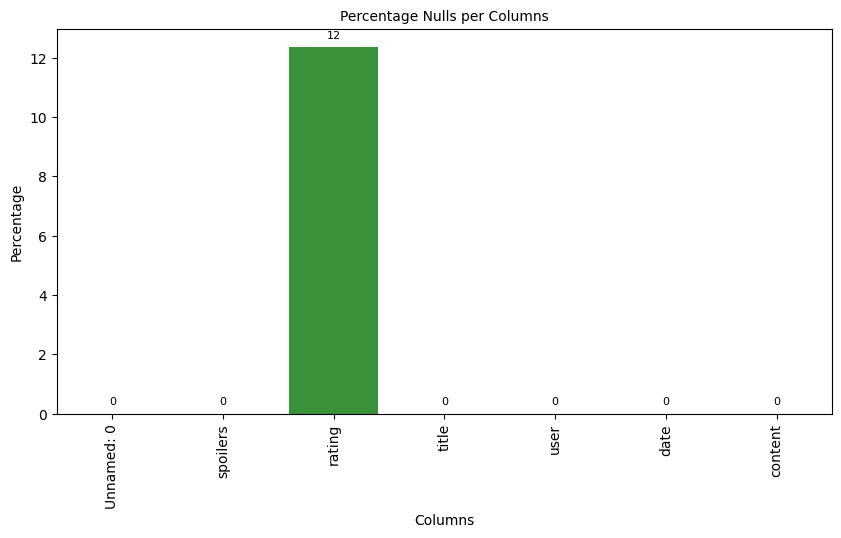

In [400]:

df_graph = round((df.isnull().sum() * 100 / len(df1)), 2)
GeneralGraphs("Percentage Nulls per Columns", x_rotation=90, bar_fontsize=8).bar_plot(df_graph.index,
                                                                                       df_graph.values,
                                                                                       "Columns",
                                                                                       "Percentage")

In [402]:
# Duplicate Values
df1[df1["user"].isin(df1[df1.duplicated()]["user"].values)]

,Unnamed: 0,spoilers,rating,title,user,date,content


In [403]:
# remove null values
df1 = df1.dropna()

In [404]:
# we check the deletion
df1.isnull().sum()

Unnamed: 0    0
spoilers      0
rating        0
title         0
user          0
date          0
content       0
dtype: int64

In [405]:
# Function to extract the first number from the column "numbers"
extract_first_number = lambda x: int(x.split("/")[0])

# Aplicar la función a la columna "numeros"
df1["rating_alone"] = df1["rating"].apply(extract_first_number)

In [406]:
df1

,Unnamed: 0,spoilers,rating,title,user,date,content,rating_alone
0,0,True,10/10,Some birds aren\'t meant to be caged.,hitchcockthelegend,2010-07-24,The Shawshank Redemption is written and direct...,10
1,1,False,10/10,An incredible movie. One that lives with you.,Sleepin_Dragon,2021-02-17,It is no wonder that the film has such a high ...,10
2,2,False,10/10,Don\'t Rent Shawshank.,EyeDunno,2005-11-21,I'm trying to save you money; this is the last...,10
3,3,False,10/10,This is How Movies Should Be Made,alexkolokotronis,2008-02-18,This movie is not your ordinary Hollywood flic...,10
4,4,True,10/10,A classic piece of unforgettable film-making.,kaspen12,2006-02-10,"In its Oscar year, Shawshank Redemption (writt...",10
...,...,...,...,...,...,...,...,...
2489,2489,True,10/10,A Lesson in Film History,Eumenides_0,2010-02-25,Watching Fritz Lang's M is watching the histor...,10
2490,2490,False,10/10,Timeless.,Quicksand,2001-11-03,As riveting as it is intellectually demanding....,10
2491,2491,False,10/10,"60 years old, and still uber-suspenseful",Caliban-6,1999-01-04,The opening scene of this movie is the first c...,10
2492,2492,False,10/10,As relevant today as when it was made,meathookcinema,2017-11-01,This film works on many different levels.First...,10


In [407]:
# We remove unnecessary columns
df1.drop(columns=['Unnamed: 0',"spoilers", "rating","title","user"], inplace = True)

In [408]:
# We order index
df1.reset_index(drop=True)

,date,content,rating_alone
0,2010-07-24,The Shawshank Redemption is written and direct...,10
1,2021-02-17,It is no wonder that the film has such a high ...,10
2,2005-11-21,I'm trying to save you money; this is the last...,10
3,2008-02-18,This movie is not your ordinary Hollywood flic...,10
4,2006-02-10,"In its Oscar year, Shawshank Redemption (writt...",10
...,...,...,...
2181,2010-02-25,Watching Fritz Lang's M is watching the histor...,10
2182,2001-11-03,As riveting as it is intellectually demanding....,10
2183,1999-01-04,The opening scene of this movie is the first c...,10
2184,2017-11-01,This film works on many different levels.First...,10


In [409]:
# We verify unique values of the target
df1['rating_alone'].unique()

array([10,  9,  7,  8,  6,  5,  4,  3,  1,  2], dtype=int64)

<AxesSubplot: ylabel='rating_alone'>

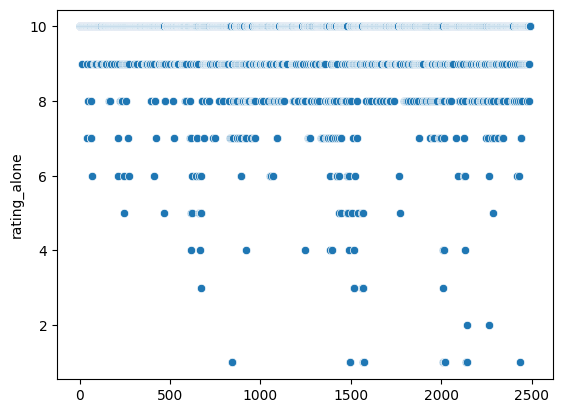

In [410]:
sns.scatterplot(df1['rating_alone'])

### Preprocessing

In [411]:
df1["content_processed"] = preprocessing(df1["content"])

In [412]:
df1

,date,content,rating_alone,content_processed
0,2010-07-24,The Shawshank Redemption is written and direct...,10,shawshank redempt written direct frank darabon...
1,2021-02-17,It is no wonder that the film has such a high ...,10,wonder film high rate quit liter breathtak say...
2,2005-11-21,I'm trying to save you money; this is the last...,10,tri save money last film titl consid borrow re...
3,2008-02-18,This movie is not your ordinary Hollywood flic...,10,movi ordinari hollywood flick great deep messa...
4,2006-02-10,"In its Oscar year, Shawshank Redemption (writt...",10,oscar year shawshank redempt written direct fr...
...,...,...,...,...
2489,2010-02-25,Watching Fritz Lang's M is watching the histor...,10,leon helm virtuou epic film crime drama genr f...
2490,2001-11-03,As riveting as it is intellectually demanding....,10,decid christma eve reacquaint old friend sergi...
2491,1999-01-04,The opening scene of this movie is the first c...,10,sergio leon made epic cinema understood event ...
2492,2017-11-01,This film works on many different levels.First...,10,seen mani movi good bad one thing certain upon...
